# Coding for Glottochronology Project

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import networkx as nx

In [2]:
#Importing dataset
df = pd.read_excel (r'C:\Users\MAGIC VISIMEET\Documents\Dataset\Germanic Languages Dataset.xls', sheet_name='Sheet2')

In [3]:
#Removing elements without information
df = df.dropna()

In [4]:
#Removing columns not being studied
columns = ['Scots', 'Afrikaans', 'Limburgish', 'Central Franconian', 'Luxembourgish', 'Yiddish', 'Number']
df.drop(columns, inplace=True, axis=1)

In [5]:
#Renaming languages
df = df.rename({"West Frisian":"Frisian", "Norwegian (bokmål)":"Norwegian B", "Norwegian (nynorsk)":"Norwegian N"}, axis='columns')

In [6]:
#Removing punctuation
df = df.replace({'/',',','[(]','[)]'},'', regex=True)

In [7]:
#Only including the first word from all columns
df['English'] = df['English'].str.split(n=1).str[0]
df['Frisian'] = df['Frisian'].str.split(n=1).str[0]
df['Dutch'] = df['Dutch'].str.split(n=1).str[0]
df['Low Saxon'] = df['Low Saxon'].str.split(n=1).str[0]
df['German'] = df['German'].str.split(n=1).str[0]
df['Danish'] = df['Danish'].str.split(n=1).str[0]
df['Swedish'] = df['Swedish'].str.split(n=1).str[0]
df['Faroese'] = df['Faroese'].str.split(n=1).str[0]
df['Icelandic'] = df['Icelandic'].str.split(n=1).str[0]
df['Norwegian B'] = df['Norwegian B'].str.split(n=1).str[0]
df['Norwegian N'] = df['Norwegian N'].str.split(n=1).str[0]
df['Gothic'] = df['Gothic'].str.split(n=1).str[0]

In [8]:
#Removing capital letters
def content_consistent(df):
    cols = df.select_dtypes(object).columns
    df[cols] = df[cols].apply(lambda x: x.str.lower())
    return df

df = content_consistent(df)
df

,English,Frisian,Dutch,Low Saxon,German,Danish,Swedish,Faroese,Icelandic,Norwegian B,Norwegian N,Gothic
0,i,ik,ik,ik,ich,jeg,jag,eg,ég,jeg,eg,𐌹𐌺
1,you,do,jij,du,du,du,du,tú,þú,du,du,𐌸𐌿
4,he,hy,hij,he,er,han,han,hann,hann,han,han,𐌹𐍃
5,we,wy,wij,wi,wir,vi,vi,vit,við,vi,vi,𐍅𐌴𐌹𐍃
6,you,jimme,jullie,ji,ihr,i,ni,tit,þið,dere,de,𐌾𐌿𐍃
...,...,...,...,...,...,...,...,...,...,...,...,...
236,with,mei,met,mit,mit,med,med,við,með,med,med,𐌼𐌹𐌸
237,and,en,en,un,und,og,och,og,og,og,og,𐌾𐌰𐌷
238,if,at,als,wenn,wenn,hvis,om,um,ef,hvis,om,𐌾𐌰𐌱𐌰𐌹
239,because,omdat,omdat,wielt,weil,fordi,eftersom,tí,því,fordi,av,𐌿𐌽𐍄𐌴


In [9]:
from unidecode import unidecode

for col in ['English','Frisian', 'Dutch', 'Low Saxon', 'German', 'Danish', 'Swedish', 'Faroese', 'Icelandic', 'Norwegian B', 'Norwegian N', 'Gothic']:
    df[col] = df[col].apply(unidecode)

df

,English,Frisian,Dutch,Low Saxon,German,Danish,Swedish,Faroese,Icelandic,Norwegian B,Norwegian N,Gothic
0,i,ik,ik,ik,ich,jeg,jag,eg,eg,jeg,eg,
1,you,do,jij,du,du,du,du,tu,thu,du,du,
4,he,hy,hij,he,er,han,han,hann,hann,han,han,
5,we,wy,wij,wi,wir,vi,vi,vit,vid,vi,vi,
6,you,jimme,jullie,ji,ihr,i,ni,tit,thid,dere,de,
...,...,...,...,...,...,...,...,...,...,...,...,...
236,with,mei,met,mit,mit,med,med,vid,med,med,med,
237,and,en,en,un,und,og,och,og,og,og,og,
238,if,at,als,wenn,wenn,hvis,om,um,ef,hvis,om,
239,because,omdat,omdat,wielt,weil,fordi,eftersom,ti,thvi,fordi,av,


In [10]:
GermanWord = "groß"
GothicWord = "𐍅𐌴𐌹𐍃"

print("The German word has been decoded as: " + unidecode(GermanWord))
print("The Gothic word has been decoded as: " + unidecode(GothicWord))

The German word has been decoded as: gross
The Gothic word has been decoded as: 


In [11]:
#Removing Gothic
column = ['Gothic']
df.drop(column, inplace=True, axis=1)

In [12]:
#Initialising pairs of phonological similarities
SIM1 = ('c', 'k')
SIM2 = ('c', 's')
SIM3 = ('y', 'j')
SIM4 = ('b', 'p')
SIM5 = ('d', 't')
SIM6 = ('g', 'k')
SIM7 = ('v', 'f')
SIM8 = ('w', 'v')
SIM9 = ('x', 'h')
SIM10 = ('e', 'i')
SIM11 = ('g', 'x')

In [13]:
#Function to implement the Levenshtein Algorithm
def LevDistMatrix(token1, token2):
    #Removing any words with length 0.
    if len(token1) == 0:
        print ("Error: Length of Word 1 is 0")
    elif len(token2) == 0:
        print ("Error: Length of Word 2 is 0")
    else:
        distances = np.zeros((len(token1) + 1, len(token2) + 1))
        #Creating the matrix
        for t1 in range(len(token1) + 1):
            distances[t1][0] = t1
        for t2 in range(len(token2) + 1):
            distances[0][t2] = t2
        a = 0
        b = 0
        c = 0
        
        #Iterating over all letters in both words
        for t1 in range(1, len(token1) + 1):
            for t2 in range(1, len(token2) + 1):
                if (token1[t1-1] == token2[t2-1]):
                    distances[t1][t2] = distances[t1 - 1][t2 - 1]
                    
                else:
                    a = distances[t1][t2 - 1]
                    b = distances[t1 - 1][t2]
                    c = distances[t1 - 1][t2 - 1]
                
                    if (token1[t1-1] in SIM1 and token2[t2-1] in SIM1) or (token1[t1-1] in SIM2 and token2[t2-1] in SIM2) or (token1[t1-1] in SIM3 and token2[t2-1] in SIM3) or (token1[t1-1] in SIM4 and token2[t2-1] in SIM4) or (token1[t1-1] in SIM5 and token2[t2-1] in SIM5) or (token1[t1-1] in SIM6 and token2[t2-1] in SIM6) or (token1[t1-1] in SIM7 and token2[t2-1] in SIM7) or (token1[t1-1] in SIM8 and token2[t2-1] in SIM8) or (token1[t1-1] in SIM9 and token2[t2-1] in SIM9) or (token1[t1-1] in SIM10 and token2[t2-1] in SIM10) or (token1[t1-1] in SIM11 and token2[t2-1] in SIM11):
                        if (a <= b and a <= c):
                            distances[t1][t2] = a + 0.5
                        elif (b <= a and b <= c):
                            distances[t1][t2] = b + 0.5
                        else:
                            distances[t1][t2] = c + 0.5
    
                    else:
                        if (a <= b and a <= c):
                            distances[t1][t2] = a + 1
                        elif (b <= a and b <= c):
                            distances[t1][t2] = b + 1
                        else:
                            distances[t1][t2] = c + 1
    return distances[len(token1)][len(token2)], distances
#Returns the Levenshtein Distance as well as the created matrix 

In [14]:
#Words chosen arbitrarily
display(df.iloc[123][4])
display(df.iloc[123][5])

'sitzen'

'sidde'

In [15]:
#Levenshtein Algorithm
LevDistMatrix("sitzen", "sidde")

(2.5,
 array([[0. , 1. , 2. , 3. , 4. , 5. ],
        [1. , 0. , 1. , 2. , 3. , 4. ],
        [2. , 1. , 0. , 1. , 2. , 2.5],
        [3. , 2. , 1. , 0.5, 1. , 2. ],
        [4. , 3. , 2. , 1.5, 1.5, 2. ],
        [5. , 4. , 2.5, 2.5, 2.5, 1.5],
        [6. , 5. , 3.5, 3.5, 3.5, 2.5]]))

In [16]:
#Function to calculate the Levenshtein Distance
def LevDist(token1, token2):
    return LevDistMatrix(token1, token2)[0]

LevDist("sitzen", "sidde")

2.5

In [17]:
#Function to show the Levenshtein Matrix
def LevMatrix(token1, token2):
    return LevDistMatrix(token1, token2)[1]

#Words can also be chosen from their position in the dataset
LevMatrix(df.iloc[123][4], df.iloc[123][5])

array([[0. , 1. , 2. , 3. , 4. , 5. ],
       [1. , 0. , 1. , 2. , 3. , 4. ],
       [2. , 1. , 0. , 1. , 2. , 2.5],
       [3. , 2. , 1. , 0.5, 1. , 2. ],
       [4. , 3. , 2. , 1.5, 1.5, 2. ],
       [5. , 4. , 2.5, 2.5, 2.5, 1.5],
       [6. , 5. , 3.5, 3.5, 3.5, 2.5]])

In [18]:
#Levenshtein distance between English and Frisian words
EnglishFrisianLevDist = []
for i in range(len(df)):
    EnglishFrisianLevDist.append(LevDist(df.iloc[i][0], df.iloc[i][1]))
    
#EnglishFrisianLevDist

In [19]:
#Function to calculate the mean average
def Average(Values):
    return (sum(Values)/len(Values))

In [20]:
#Function to calculate the standard deviation
def StandardDeviation(Values):
    mean = sum(Values) / len(Values)
    var = sum((v - mean)**2 for v in Values) / len(Values)
    std = var ** 0.5
    return std

In [21]:
#Average of the Levenshtein Distances for English and Frisian
Average(EnglishFrisianLevDist)

3.3883495145631066

In [22]:
#Standard Deviation of the Levenshtein Distances for English and Frisian
StandardDeviation(EnglishFrisianLevDist)

1.8167666237627262

In [23]:
#Levenshtein Distances for all words of all languages
AllLevDist = []
for g in range(len(df.columns)):
    for h in range(len(df.columns)):
        for i in range(len(df)):
            AllLevDist.append(LevDist(df.iloc[i][g], df.iloc[i][h]))  

#AllLevDist

In [24]:
#Adjusted score for the Levenshtein Distances to balance word-lenghths
AdjustedLevDist = []
for g in range(len(df.columns)):
    for h in range(len(df.columns)):
        for j in range(len(df)):
            AdjustedLevDist.append(LevDist(df.iloc[j][g], df.iloc[j][h]) / (0.5 * (len(df.iloc[j][g]) + (len(df.iloc[j][h]))))) 
            
#AdjustedLevDist

In [25]:
#Resizing the list of results into subsets for each language
BrokenList = list()
BrokenSize = len(df)

for m in range(0, len(AdjustedLevDist), BrokenSize):
    BrokenList.append(AdjustedLevDist[m:m + BrokenSize])

#BrokenList

In [26]:
#Creating a list of the averages
AverageList = list()
for n in range(len(df.columns) ** 2):
    AverageList.append(Average(BrokenList[n]))

#AverageList

In [27]:
#Creating a list of the stds
StdList = list()
for n in range(len(df.columns) ** 2):
    StdList.append(StandardDeviation(BrokenList[n]))

#StdList

In [28]:
#Reshaping the averages into a square matrix
FinalArray = np.asarray(AverageList).reshape(len(df.columns), len(df.columns))

names = ['English', 'Frisian', 'Dutch', 'Low Saxon', 'German', 'Danish', 'Swedish', 'Faroese', 'Icelandic', 'Norwegian (Bokmål)', 'Norwegian (Nynorsk)']
df_FinalArray = pd.DataFrame(FinalArray, index = names, columns = names)

df_FinalArray

,English,Frisian,Dutch,Low Saxon,German,Danish,Swedish,Faroese,Icelandic,Norwegian (Bokmål),Norwegian (Nynorsk)
English,0.000000,0.840051,0.852082,0.840739,0.906914,0.868280,0.864487,0.922883,0.910659,0.840244,0.859149
Frisian,0.840051,0.000000,0.490155,0.538772,0.607488,0.671056,0.720655,0.775560,0.813555,0.672144,0.715885
Dutch,0.852082,0.490155,0.000000,0.337893,0.451832,0.650839,0.705524,0.749014,0.791841,0.663611,0.693521
Low Saxon,0.840739,0.538772,0.337893,0.000000,0.374957,0.623075,0.670132,0.711868,0.761914,0.630604,0.656131
German,0.906914,0.607488,0.451832,0.374957,0.000000,0.651113,0.696999,0.749445,0.788102,0.673024,0.710967
Danish,0.868280,0.671056,0.650839,0.623075,0.651113,0.000000,0.369130,0.537008,0.575439,0.213040,0.345737
Swedish,0.864487,0.720655,0.705524,0.670132,0.696999,0.369130,0.000000,0.501153,0.556264,0.336326,0.310681
Faroese,0.922883,0.775560,0.749014,0.711868,0.749445,0.537008,0.501153,0.000000,0.311150,0.509159,0.425916
Icelandic,0.910659,0.813555,0.791841,0.761914,0.788102,0.575439,0.556264,0.311150,0.000000,0.540410,0.453647
Norwegian (Bokmål),0.840244,0.672144,0.663611,0.630604,0.673024,0.213040,0.336326,0.509159,0.540410,0.000000,0.191884


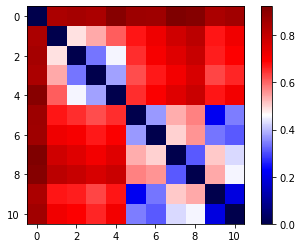

In [29]:
#Creation of a heatmap to show the similarity between the languages
cmap = "seismic"
plt.imshow(FinalArray, cmap=cmap)
plt.colorbar()
plt.show()
#Blue shows a very close relationship, Red shows hardly any relationship

In [30]:
#Reshaping the stds into a square matrix
FinalArray2 = np.asarray(StdList).reshape(len(df.columns), len(df.columns))

names = ['English', 'Frisian', 'Dutch', 'Low Saxon', 'German', 'Danish', 'Swedish', 'Faroese', 'Icelandic', 'Norwegian B', 'Norwegian N']
df_FinalArray2 = pd.DataFrame(FinalArray2, index = names, columns = names)

#df_FinalArray2

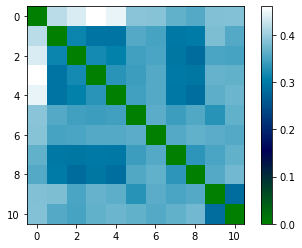

In [31]:
#Creation of a heatmap to show the standard deviations
cmap =  "ocean"
plt.imshow(FinalArray2, cmap = cmap)
plt.colorbar()
plt.show()

In [32]:
#Creating an array of the closest three languages to each individual language
df_English = df_FinalArray.sort_values(by = 'English')
Index_English = df_English.index[1:4]

df_Frisian = df_FinalArray.sort_values(by = 'Frisian')
Index_Frisian = df_Frisian.index[1:4]

df_Dutch = df_FinalArray.sort_values(by = 'Dutch')
Index_Dutch = df_Dutch.index[1:4]

df_LowSaxon = df_FinalArray.sort_values(by = 'Low Saxon')
Index_LowSaxon = df_LowSaxon.index[1:4]

df_German = df_FinalArray.sort_values(by = 'German')
Index_German = df_German.index[1:4]

df_Danish = df_FinalArray.sort_values(by = 'Danish')
Index_Danish = df_Danish.index[1:4]

df_Swedish = df_FinalArray.sort_values(by = 'Swedish')
Index_Swedish = df_Swedish.index[1:4]

df_Faroese = df_FinalArray.sort_values(by = 'Faroese')
Index_Faroese = df_Faroese.index[1:4]

df_Icelandic = df_FinalArray.sort_values(by = 'Icelandic')
Index_Icelandic = df_Icelandic.index[1:4]

df_NorwegianB = df_FinalArray.sort_values(by = 'Norwegian (Bokmål)')
Index_NorwegianB = df_NorwegianB.index[1:4]

df_NorwegianN = df_FinalArray.sort_values(by = 'Norwegian (Nynorsk)')
Index_NorwegianN = df_NorwegianN.index[1:4]

In [33]:
#Creating a table showing the three closest languages (in order) to 
Index_English.values
idx = ["1", "2", "3"]
df_EnglishTop3 = pd.DataFrame(data = Index_English.values, index = idx)
df_EnglishTop3.columns = ["English"]
#df_EnglishTop3

In [34]:
datavalues = [Index_Frisian.values, Index_Dutch.values, Index_LowSaxon.values, Index_German.values, Index_Danish.values, Index_Swedish.values, Index_Faroese.values, Index_Icelandic.values, Index_NorwegianB.values, Index_NorwegianN.values]
df_add = pd.DataFrame(data = datavalues, columns = idx)

df_AllTop3 = pd.concat([df_EnglishTop3, df_add.T], axis = 1)
df_AllTop3.columns = ["English", "Frisian", "Dutch", "Low Saxon", "German", "Danish", "Swedish", "Faroese", "Icelandic", "Norwegian (Bokmål)", "Norwegian (Nynorsk)"]
df_AllTop3

,English,Frisian,Dutch,Low Saxon,German,Danish,Swedish,Faroese,Icelandic,Norwegian (Bokmål),Norwegian (Nynorsk)
1,Frisian,Dutch,Low Saxon,Dutch,Low Saxon,Norwegian (Bokmål),Norwegian (Nynorsk),Icelandic,Faroese,Norwegian (Nynorsk),Norwegian (Bokmål)
2,Norwegian (Bokmål),Low Saxon,German,German,Dutch,Norwegian (Nynorsk),Norwegian (Bokmål),Norwegian (Nynorsk),Norwegian (Nynorsk),Danish,Swedish
3,Low Saxon,German,Frisian,Frisian,Frisian,Swedish,Danish,Swedish,Norwegian (Bokmål),Swedish,Danish


In [35]:
#Creation of a Minimum Spanning Tree
from scipy.sparse.csgraph import minimum_spanning_tree

Tcsr = minimum_spanning_tree(FinalArray)
TcsrArray = Tcsr.toarray().astype(float)
#TcsrArray

In [36]:
#Minimum Spanning Tree shown in matrix form
FinalTcsrArray = np.asarray(TcsrArray).reshape(len(df.columns), len(df.columns))
names = ['English', 'West Frisian', 'Dutch', 'Low Saxon', 'German', 'Danish', 'Swedish', 'Faroese', 'Icelandic', 'Norwegian B', 'Norwegian N']
df_FinalTcsrArray = pd.DataFrame(FinalTcsrArray, index = names, columns = names)

#df_FinalTcsrArray

In [37]:
#Arcs of the Minimum Spanning Tree and their weights
from scipy.sparse import csr_matrix

Tree = csr_matrix(Tcsr)
print(Tree)

  (1, 0)	0.8400509819199139
  (1, 2)	0.490154848403706
  (2, 3)	0.33789298619395713
  (3, 4)	0.3749569628924283
  (3, 5)	0.6230745387298784
  (8, 7)	0.31114991756767885
  (9, 5)	0.2130400613410322
  (10, 6)	0.3106811001835272
  (10, 7)	0.42591605044489117
  (10, 9)	0.1918840947110507


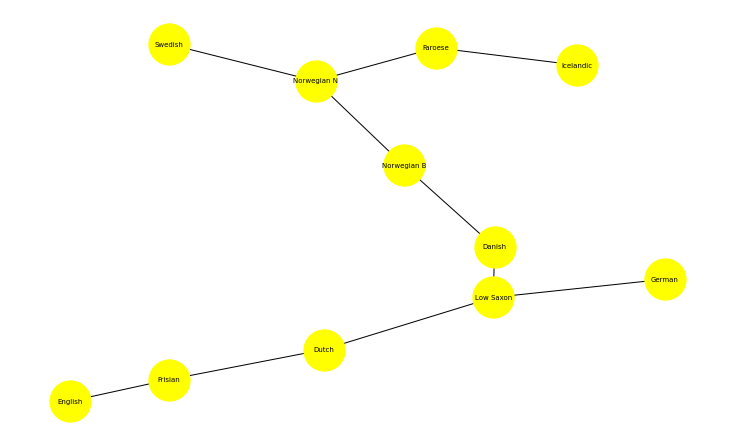

In [38]:
#Visualisation of the Network
plt.figure(figsize = (10,6), facecolor = "w", frameon = False)

TreeViz = nx.from_numpy_matrix(FinalTcsrArray)
mylabels = {0: 'English', 1: 'Frisian', 2: 'Dutch', 3: 'Low Saxon', 4: 'German', 5: 'Danish', 6: 'Swedish', 7: 'Faroese', 8: 'Icelandic', 9: 'Norwegian B', 10: 'Norwegian N'}
nx.draw(TreeViz, with_labels = True, labels = mylabels, node_size = 1700, font_size = 7, node_color = 'yellow')

plt.show
plt.savefig("CodedNetwork.png")

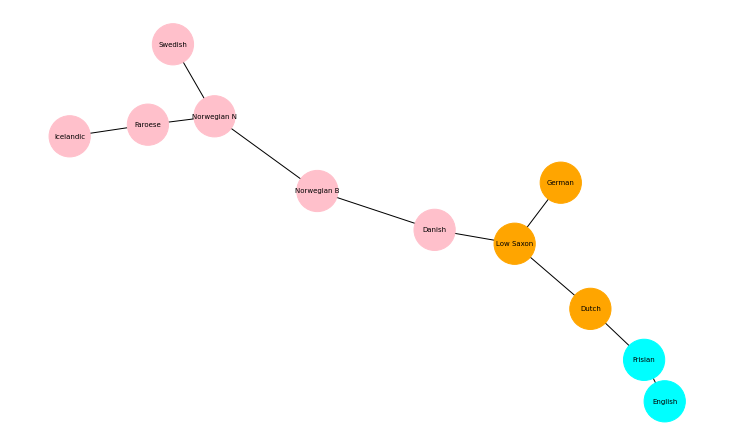

In [39]:
#Visualisation of the Network including the colouring of clusters
plt.figure(figsize = (10,6), facecolor = "w", frameon = False)

node_colors = []
for i in range(0,11):
    if i < 2:
        node_colors.append('cyan')
    elif i < 5:
        node_colors.append('orange')
    else: 
        node_colors.append('pink')

nx.draw(TreeViz, with_labels = True, labels = mylabels, node_size = 1700, font_size = 7, node_color = node_colors)
plt.show
plt.savefig("CodedNetworkColoured.png")